In [1]:
# Imports
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# load the data
full_train_set = '../NSL_KDD Dataset/KDDTrain+.txt'
train_20_percent = '../NSL_KDD Dataset/KDDTrain+_20Percent.txt'
test_set = '../NSL_KDD Dataset/KDDTest+.txt'

In [4]:
df_train = pd.read_csv(full_train_set)
df_test = pd.read_csv(test_set)

In [5]:
# add the column labels
columns = (['duration' 
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [6]:
df_train.columns = columns
df_test.columns = columns

In [7]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [9]:
# map normal to 0, all attacks to 1
train_attack = df_train.attack.map(lambda a:0 if a == 'normal' else 1)
test_attack = df_test.attack.map(lambda a:0 if a == 'normal' else 1)

df_train['attack_flag'] = train_attack
df_test['attack_flag'] = test_attack

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


References from Research Papers- http://45.113.122.54/pdfs/ijrscse/v2-i3/7.pdf - Attack cassifications for ML algos https://lupinepublishers.com/computer-science-journal/fulltext/detecting-distributed-denial-of-service-ddos-attacks.ID.000110.php

In [10]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [11]:
# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

In [12]:
# map the data and join to the data set
attack_map = df_train.attack.apply(map_attack)
df_train['attack_map'] = attack_map

test_attack_map = df_test.attack.apply(map_attack)
df_test['attack_map'] = test_attack_map

In [13]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [14]:
# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df_train.attack, df_train.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [15]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])
        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   

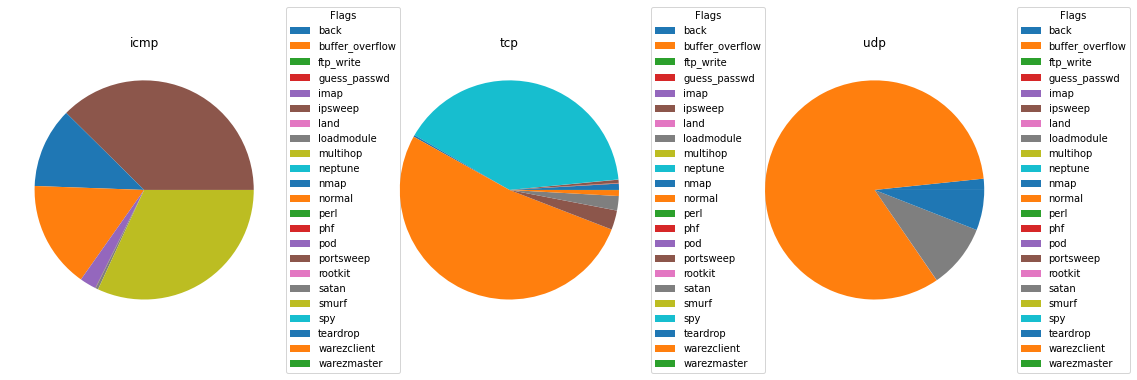

In [16]:
# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

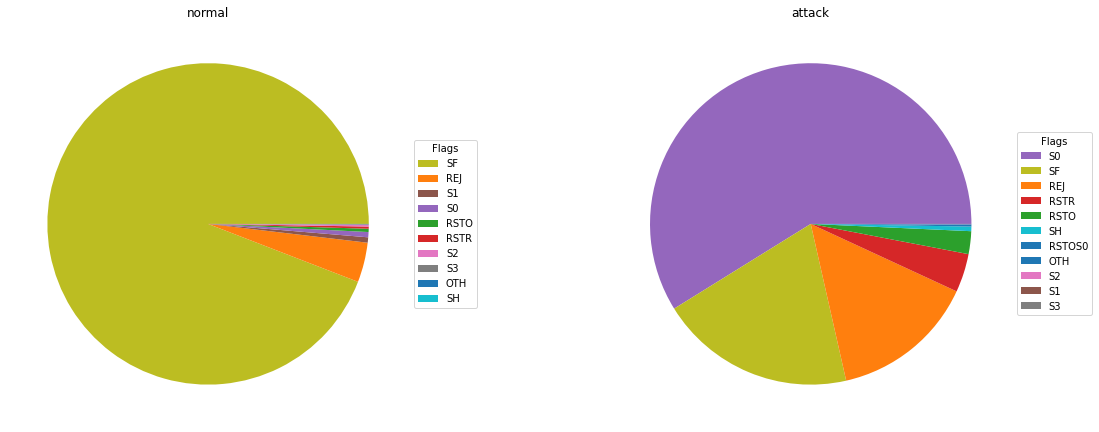

In [17]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df_train.loc[df_train.attack_flag == 0].flag.value_counts()
attack_flags = df_train.loc[df_train.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

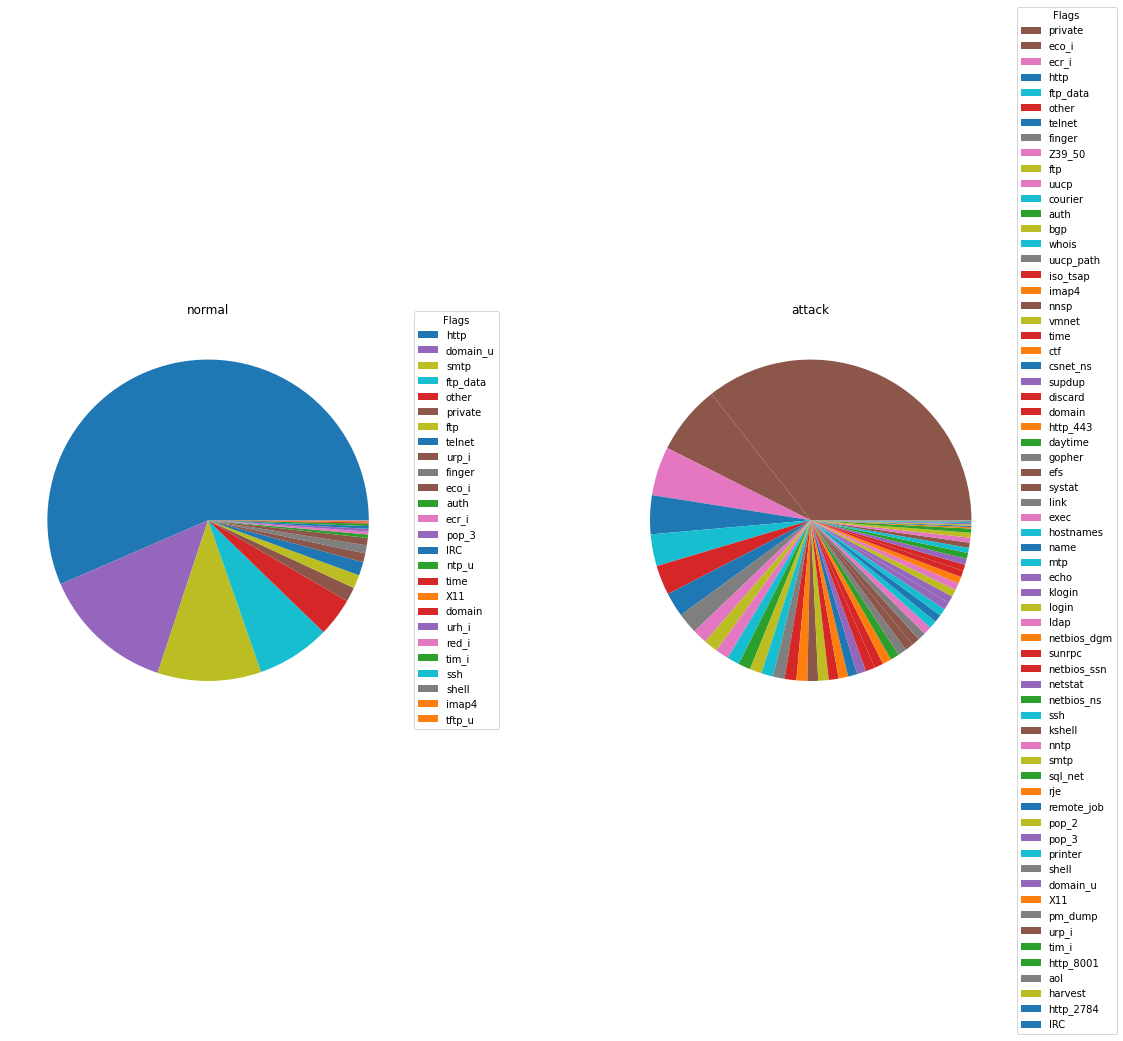

In [18]:
# get a series with the count of each service for attack and normal traffic
normal_services = df_train.loc[df_train.attack_flag == 0].service.value_counts()
attack_services = df_train.loc[df_train.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()

<AxesSubplot:xlabel='level', ylabel='Density'>

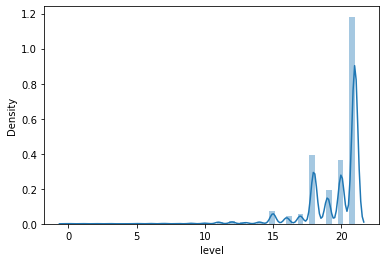

In [19]:
sns.distplot(df_train['level'])

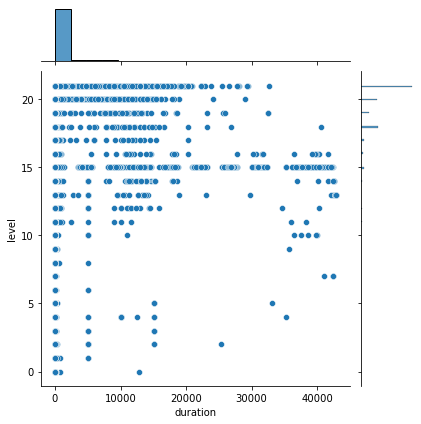

In [20]:
sns.jointplot(x='duration', y='level', data=df_train, kind='scatter')

In [21]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df_train[features_to_encode])
test_encoded_base = pd.get_dummies(df_test[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(df_test.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df_train[numeric_features])
test_set = test_final.join(df_test[numeric_features])

In [22]:
# create our target classifications
binary_y = df_train['attack_flag']
multi_y = df_train['attack_map']

test_binary_y = df_test['attack_flag']
test_multi_y = df_test['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.6)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)

In [32]:
#Decision Tree
clf = DecisionTreeClassifier() #max_depth=10
clf = clf.fit(binary_train_X, binary_train_y)
clf_predictions = clf.predict(binary_val_X) # make prediction
train_acc = clf.score(binary_train_X, binary_train_y) # mean acc on train data
base_clf_score = accuracy_score(clf_predictions,binary_val_y) # mean acc on test data
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", base_clf_score)

Training accuracy is: 0.9940263554814638
Testing accuracy is: 0.9928027095681625


In [33]:
rlf = RandomForestClassifier() #max_depth=10
rlf = rlf.fit(binary_train_X, binary_train_y)
rlf_predictions = rlf.predict(binary_val_X) # make prediction
train_acc_1 = rlf.score(binary_train_X, binary_train_y) # mean acc on train data
base_rlf_score = accuracy_score(rlf_predictions,binary_val_y) # mean acc on test data
print("Training accuracy is:", train_acc_1 )
print("Testing accuracy is:", base_rlf_score)

Training accuracy is: 0.9940263554814638
Testing accuracy is: 0.9934906858594411


In [24]:
#Decision Tree Performance Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
Tree_f1 = f1_score(binary_val_y, clf_predictions, average="macro")
Tree_precision = precision_score(binary_val_y, clf_predictions, average="macro")
Tree_recall = recall_score(binary_val_y, clf_predictions, average="macro")
Tree_accuracy = accuracy_score(binary_val_y, clf_predictions)
print("F1 Score of Decision trees:", Tree_f1)
print("Precision of Decision trees:", Tree_precision)
print("Recall of Decision trees:", Tree_recall)
print("Accuracy of Decision trees:", Tree_accuracy)

F1 Score of Decision trees: 0.9927386343489466
Precision of Decision trees: 0.9926082455089089
Recall of Decision trees: 0.9928761403315229
Accuracy of Decision trees: 0.9927762489415749


In [35]:
Forest_f1 = f1_score(binary_val_y, rlf_predictions, average="macro")
Forest_precision = precision_score(binary_val_y, rlf_predictions, average="macro")
Forest_recall = recall_score(binary_val_y, rlf_predictions, average="macro")
Forest_accuracy = accuracy_score(binary_val_y, rlf_predictions)
print("F1 Score of Random Forest:", Forest_f1)
print("Precision of Random Forest:", Forest_precision)
print("Recall of Random Forest:", Forest_recall)
print("Accuracy of Random Forest:", Forest_accuracy)

F1 Score of Random Forest: 0.993456439739385
Precision of Random Forest: 0.9933504837328669
Recall of Random Forest: 0.9935669869304666
Accuracy of Random Forest: 0.9934906858594411


In [52]:
# define the list of models that we want to test
models = [
    LogisticRegression(max_iter=250),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    
]

# an empty list to capture the performance of each model
model_comps = []

# walk through the models and populate our list
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, binary_train_X, binary_train_y, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps.append((model_name, count, accuracy))



<AxesSubplot:>

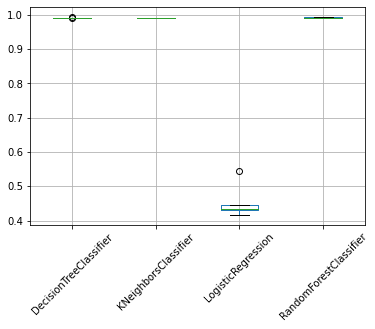

In [51]:
# a box plot will do well to show us overall performance and the variation in the models.
result_df = pd.DataFrame(model_comps, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count',columns='model_name',values='accuracy').boxplot(rot=45)



In [27]:
# a helper function for getting some analytical data about our predictions
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    return prediction_data

<AxesSubplot:>

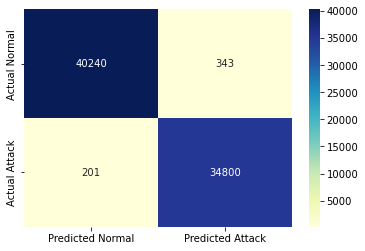

In [41]:
# capture our prediction data
binary_prediction_data_tree = add_predictions(df_train,
                                         clf_predictions,
                                         binary_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data_tree['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

<AxesSubplot:>

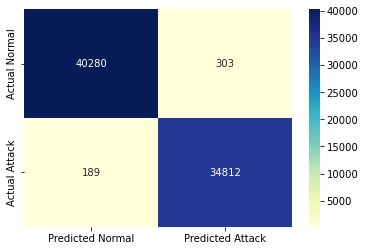

In [42]:
# capture our prediction data
binary_prediction_data_forest = add_predictions(df_train,
                                         rlf_predictions,
                                         binary_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data_forest['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [43]:
# dataframe to store incorrect classification
binary_prediction_data_tree['errors'].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag,attack_map,predicted,actual
count,544.000000,5.440000e+02,5.440000e+02,544.000000,544.0,544.000000,544.000000,544.000000,544.000000,544.000000,...,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,131.551471,1.311424e+06,7.577390e+03,0.007353,0.0,0.003676,0.183824,0.022059,0.132353,0.218750,...,0.054945,0.105423,0.037371,0.304688,0.350313,15.365809,0.369485,0.621324,0.630515,0.369485
std,1173.514492,2.973052e+07,7.834289e+04,0.085512,0.0,0.060578,1.327994,0.249254,0.339186,2.081652,...,0.177791,0.246752,0.152145,0.441017,0.462586,5.422177,0.483110,1.013711,0.483110,0.483110
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.040000,0.010000,0.955000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000
max,18175.000000,6.933756e+08,1.437092e+06,1.000000,0.0,1.000000,18.000000,5.000000,1.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,4.000000,1.000000,1.000000


In [44]:
# dataframe to store incorrect classification
binary_prediction_data_forest['errors'].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag,attack_map,predicted,actual
count,492.000000,4.920000e+02,492.000000,492.000000,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,23.707317,1.425013e+06,4900.292683,0.008130,0.0,0.008130,0.132114,0.012195,0.087398,0.223577,...,0.054553,0.110915,0.031850,0.321585,0.372134,15.044715,0.384146,0.662602,0.615854,0.384146
std,258.179360,3.126014e+07,57326.782034,0.089891,0.0,0.110244,1.145622,0.229791,0.282705,2.183724,...,0.181748,0.253246,0.135345,0.451252,0.470591,5.615845,0.486888,1.069853,0.486888,0.486888
min,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.010000,17.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.050000,0.010000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000
max,5063.000000,6.933756e+08,988002.000000,1.000000,0.0,2.000000,18.000000,5.000000,1.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,4.000000,1.000000,1.000000


In [46]:
# see the standard deviation of the false positives
binary_prediction_data_tree['false_positives'].std()

duration                         1468.426359
src_bytes                      588633.167612
dst_bytes                       88757.490922
land                                0.107515
urgent                              0.000000
hot                                 0.988528
num_failed_logins                   0.131937
logged_in                           0.287143
num_compromised                     0.502937
root_shell                          0.076249
num_root                            0.694241
num_file_creations                  1.490008
num_shells                          0.107990
num_access_files                    0.000000
is_guest_login                      0.107515
count                               2.049321
srv_count                           4.319043
serror_rate                         0.324913
srv_serror_rate                     0.312328
rerror_rate                         0.419982
srv_rerror_rate                     0.415046
same_srv_rate                       0.099129
diff_srv_r

In [47]:
# see the standard deviation of the false positives
binary_prediction_data_forest['false_positives'].std()

duration                        13.352077
src_bytes                      449.133669
dst_bytes                      959.100075
land                             0.114325
urgent                           0.000000
hot                              0.256577
num_failed_logins                0.000000
logged_in                        0.170047
num_compromised                  0.520029
root_shell                       0.057448
num_root                         0.729988
num_file_creations               0.229794
num_shells                       0.114897
num_access_files                 0.000000
is_guest_login                   0.000000
count                            2.144956
srv_count                        4.553951
serror_rate                      0.318431
srv_serror_rate                  0.307871
rerror_rate                      0.441086
srv_rerror_rate                  0.439846
same_srv_rate                    0.091437
diff_srv_rate                    0.117509
srv_diff_host_rate               0

In [48]:
# see the standard deviation of the false negatives
binary_prediction_data_tree['false_negatives'].std()

duration                       1.889653e+02
src_bytes                      4.890634e+07
dst_bytes                      5.649613e+04
land                           0.000000e+00
urgent                         9.950124e-02
hot                            1.754015e+00
num_failed_logins              3.720322e-01
logged_in                      4.039605e-01
num_compromised                3.343725e+00
root_shell                     2.280133e-01
num_root                       4.935560e+00
num_file_creations             1.597713e+00
num_shells                     2.416774e-01
num_access_files               1.854133e-01
is_guest_login                 9.950124e-02
count                          1.363867e+02
srv_count                      6.134841e+00
serror_rate                    1.707853e-01
srv_serror_rate                1.919221e-01
rerror_rate                    4.499213e-01
srv_rerror_rate                4.627518e-01
same_srv_rate                  4.475410e-01
diff_srv_rate                  3

In [49]:
# see the standard deviation of the false negatives
binary_prediction_data_forest['false_negatives'].std()

duration                       4.144455e+02
src_bytes                      5.043437e+07
dst_bytes                      9.212584e+04
land                           0.000000e+00
urgent                         1.773826e-01
hot                            1.808052e+00
num_failed_logins              3.705195e-01
logged_in                      3.851195e-01
num_compromised                3.444924e+00
root_shell                     2.244485e-01
num_root                       5.086835e+00
num_file_creations             1.646740e+00
num_shells                     2.490554e-01
num_access_files               2.038137e-01
is_guest_login                 1.253162e-01
count                          1.254419e+02
srv_count                      6.259128e+00
serror_rate                    1.839288e-01
srv_serror_rate                1.675671e-01
rerror_rate                    4.671181e-01
srv_rerror_rate                4.733942e-01
same_srv_rate                  4.520805e-01
diff_srv_rate                  2

<AxesSubplot:>

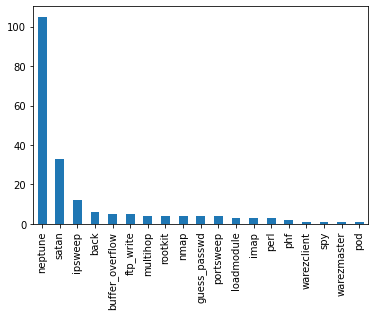

In [54]:
# distribution of false negatives
binary_prediction_data_tree['false_negatives'].attack.value_counts().plot.bar()

<AxesSubplot:>

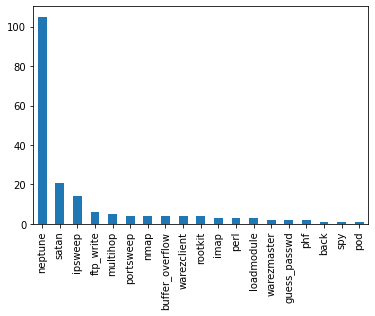

In [55]:
# distribution of false negatives
binary_prediction_data_forest['false_negatives'].attack.value_counts().plot.bar()

### Future work and changes

Generally we seem to be having an issue mainly on Neptune attacks. We will have to tweak our features. We used 'duration', 'src_bytes', 'dst_bytes' as a fit feature set. Perhaps we should be using less features or different ones?

We also one hot encoded all the attack classifications and added tons of columns to our dataframe. So we could have a case of overfitting on our model. 
One idea is to use 4 columns (DoS, Probe, Priv Esc, Remote Access) instead of every single type. So in other words group our attacks into their general categories and thus reduce the number of columns.